### Read an arbitraty image and its annotations

In [5]:
img_path = "/home/rudy/Documents/cc7221/tarea3/data/orand-car-with-bbs/training/images/0001_5179655_46066.png"
img_annotations = "/home/rudy/Documents/cc7221/tarea3/data/orand-car-with-bbs/training/annotations/0001_5179655_46066.txt"

In [17]:
with open(img_annotations, "r") as f:
    lines = f.readlines()

# boxes: xywh
bboxes = []
for line in lines:
    s = line.rstrip().split(":")
    class_label = int(s[0])
    bbox_coords = [int(c) for c in s[1].split(",")]
    bboxes.append({
        "box": bbox_coords,
        "label": class_label,
    })

### Visualization functions

In [83]:
BOX_COLOR = (255, 0, 0) # Red
TEXT_COLOR = (255, 255, 255) # White


def visualize_bbox(img, bbox, class_name, color=BOX_COLOR, thickness=1):
    """Visualizes a single bounding box on the image"""
    x_min, y_min, w, h = bbox
    x_min, x_max, y_min, y_max = int(x_min), int(x_min + w), int(y_min), int(y_min + h)

    cv2.rectangle(img, (x_min, y_min), (x_max, y_max), color=color, thickness=thickness)

    ((text_width, text_height), _) = cv2.getTextSize(class_name, cv2.FONT_HERSHEY_SIMPLEX, 0.35, 1)    
    cv2.rectangle(img, (x_min, y_min - int(1.3 * text_height)), (x_min + text_width, y_min), BOX_COLOR, -1)
    cv2.putText(
        img,
        text=class_name,
        org=(x_min, y_min - int(0.3 * text_height)),
        fontFace=cv2.FONT_HERSHEY_SIMPLEX,
        fontScale=0.35, 
        color=TEXT_COLOR, 
        lineType=cv2.LINE_AA,
    )
    return img


def visualize(image, bboxes, category_ids, category_id_to_name):
    img = image.copy()
    for bbox, category_id in zip(bboxes, category_ids):
        class_name = category_id_to_name[category_id]
        img = visualize_bbox(img, bbox, class_name)
        
    plt.figure(figsize=(12, 12))
    plt.axis('on')
    plt.imshow(img)

### Import required libraries

In [84]:
import albumentations as A
import cv2
import matplotlib.pyplot as plt

In [85]:
image = cv2.imread(img_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

#### Visualize original image

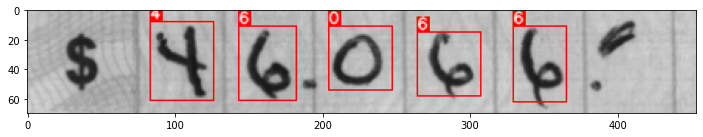

In [86]:
bboxes_list = [b['box'] for b in bboxes]
category_ids = [b['label'] for b in bboxes]
category_id_to_name = dict(zip(category_ids, [str(s) for s in category_ids]))
visualize(image, bboxes_list, category_ids, category_id_to_name)

#### Visualize transformed image

In [92]:
transform = A.Compose([
    A.Resize(65, 271), # here we can add other transformations as well
], bbox_params=A.BboxParams(format='coco', min_area=128, min_visibility=0.1, label_fields=['category_ids']))

In [99]:
transformed = transform(image=image, bboxes=bboxes_list, category_ids=category_ids)
for bbox in transformed['bboxes']:
    print(", ".join([f"{c:.0f}" for c in bbox]))

50, 7, 26, 49
85, 10, 23, 46
122, 10, 26, 40
158, 14, 26, 40
196, 10, 21, 47


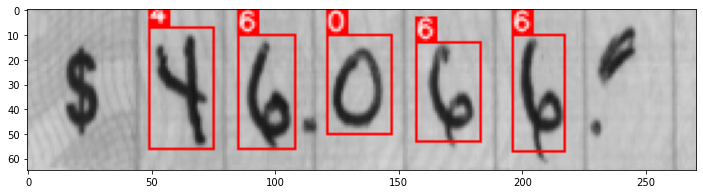

In [94]:
visualize(
    transformed['image'],
    transformed['bboxes'],
    transformed['category_ids'],
    category_id_to_name,
)